In [1]:
pip install SpeechRecognition moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 21.0 MB/s eta 0:00:00
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110743 sha256=693865c55ddd432e6dae5250c86d6b59446d46447d770d6748e8b993e3b6d4b2
  Stored in directory: /root/.cache/pip/wheels/56/dc/2b/9cd600d483c04af3353d66623056fc03faed76b7518faae4df
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import speech_recognition as sr 
import moviepy.editor as mp

In [3]:
r = sr.Recognizer()

**importing .wav (Audio File)**

In [4]:
audio = sr.AudioFile('../input/audio-speech-sentiment/TEST/112.wav')

audio1 = sr.AudioFile('../input/audio-speech-sentiment/TEST/113.wav')
audio2 = sr.AudioFile('../input/audio-speech-sentiment/TEST/115.wav')
audio3 = sr.AudioFile('../input/audio-speech-sentiment/TEST/119.wav')
audio4 = sr.AudioFile('../input/audio-speech-sentiment/TEST/123.wav')


In [5]:
with audio as source:
 audio_file = r.record(source)
result = r.recognize_google(audio_file)

In [6]:
print(result)

congratulations you won the challenge


In [7]:
#saving video text result
with open('recognized.txt',mode ='w') as file: 
   file.write("Recognized Speech:") 
   file.write("\n") 
   file.write(result) 

In [8]:
!pip install -q transformers
#Transformers functions provides a pool of pre-trained models to perform various tasks such as vision, text, and audio

In [9]:
from transformers import pipeline
data = [result]
#just taking sentiment analysis model for tweets as a trained set
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
#using pretrained tweet data
specific_model(data)

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

[{'label': 'POS', 'score': 0.9826006293296814}]

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Valence Aware Dictionary and sEntiment Reasoner
v = SentimentIntensityAnalyzer()

In [12]:
v.polarity_scores(result)

{'neg': 0.0, 'neu': 0.183, 'pos': 0.817, 'compound': 0.836}

<BarContainer object of 4 artists>

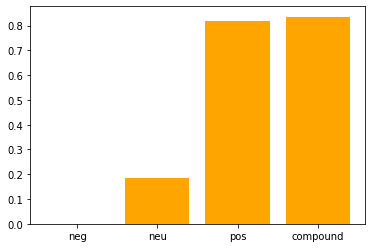

In [13]:
import matplotlib.pyplot as plt
myDictionary =v.polarity_scores(result)
plt.bar(myDictionary.keys(), myDictionary.values(), color='orange')

In [14]:
res=v.polarity_scores(result)

In [15]:
posscore=res['pos']
negscore=res['neg']
neuscore=res['neu']
compoundscore=res['compound']

In [16]:
print("\nPositive Score :")    
if (posscore==1):
    posscore=0.9 
else:
    posscore=round(posscore,1)
print(posscore)

print("\nNegative Score :")
if (negscore==1):
    negscore=0.9
else:
    negscore=round(negscore,1)
print(negscore)


Positive Score :
0.8

Negative Score :
0.0


In [17]:
!pip install -U scikit-fuzzy
import skfuzzy as fuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=8b0f60f5974e97945b825bb50054c30334bc0c2fb581a030e59d623c2a44fe1f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [18]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Generate universe variables
#   * pos and neg on subjective ranges [0, 1]
#   * op has a range of [0, 10] in units of percentage points
x_p = np.arange(0, 1, 0.1)
x_n = np.arange(0, 1, 0.1)
x_op = np.arange(0, 10, 1)


In [20]:
# Generate fuzzy membership functions
p_lo = fuzz.trimf(x_p, [0, 0, 0.5])
p_md = fuzz.trimf(x_p, [0, 0.5, 1])
p_hi = fuzz.trimf(x_p, [0.5, 1, 1])
n_lo = fuzz.trimf(x_n, [0, 0, 0.5])
n_md = fuzz.trimf(x_n, [0, 0.5, 1])
n_hi = fuzz.trimf(x_n, [0.5, 1, 1])
op_Neg = fuzz.trimf(x_op, [0, 0, 5])  # Scale : Neg Neu Pos
op_Neu = fuzz.trimf(x_op, [0, 5, 10])
op_Pos = fuzz.trimf(x_op, [5, 10, 10])

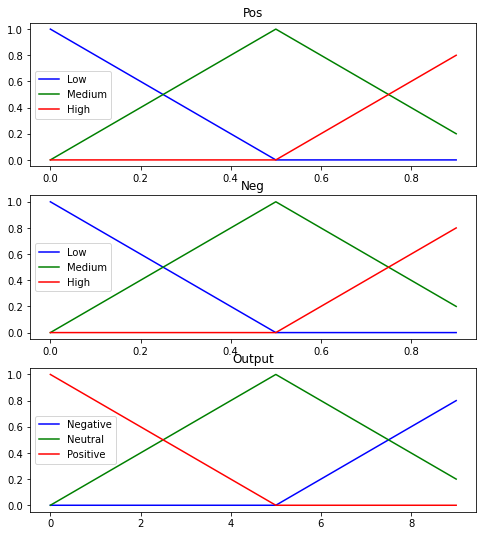

In [21]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
#
ax0.plot(x_p, p_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_p, p_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_p, p_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Pos')
ax0.legend()

ax1.plot(x_n, n_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(x_n, n_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_n, n_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('Neg')
ax1.legend()

ax2.plot(x_op, op_Pos, 'b', linewidth=1.5, label='Negative')
ax2.plot(x_op, op_Neu, 'g', linewidth=1.5, label='Neutral')
ax2.plot(x_op, op_Neg, 'r', linewidth=1.5, label='Positive')
ax2.set_title('Output')
ax2.legend()

In [22]:
sentiment=[]
sentiment_doc=[]

In [23]:
# We need the activation of our fuzzy membership functions at these values.
p_level_lo = fuzz.interp_membership(x_p, p_lo, posscore)
p_level_md = fuzz.interp_membership(x_p, p_md, posscore)
p_level_hi = fuzz.interp_membership(x_p, p_hi, posscore)
    
n_level_lo = fuzz.interp_membership(x_n, n_lo, negscore)
n_level_md = fuzz.interp_membership(x_n, n_md, negscore)
n_level_hi = fuzz.interp_membership(x_n, n_hi, negscore)

In [24]:
#defining rules
active_rule1 = np.fmin(p_level_lo, n_level_lo)
active_rule2 = np.fmin(p_level_md, n_level_lo)
active_rule3 = np.fmin(p_level_hi, n_level_lo)
active_rule4 = np.fmin(p_level_lo, n_level_md)
active_rule5 = np.fmin(p_level_md, n_level_md)
active_rule6 = np.fmin(p_level_hi, n_level_md)
active_rule7 = np.fmin(p_level_lo, n_level_hi)
active_rule8 = np.fmin(p_level_md, n_level_hi)
active_rule9 = np.fmin(p_level_hi, n_level_hi)

In [25]:
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
    
n1=np.fmax(active_rule4,active_rule7)
n2=np.fmax(n1,active_rule8)     
op_activation_lo = np.fmin(n2,op_Neg)
    
neu1=np.fmax(active_rule1,active_rule5)
neu2=np.fmax(neu1,active_rule9)     
op_activation_md = np.fmin(neu2,op_Neu)
    
p1=np.fmax(active_rule2,active_rule3)
p2=np.fmax(p1,active_rule6)   
op_activation_hi = np.fmin(p2,op_Pos)
    
op0 = np.zeros_like(x_op)

In [26]:
# Aggregate all three output membership functions together
aggregated = np.fmax(op_activation_lo,np.fmax(op_activation_md, op_activation_hi))

In [27]:
# Calculate defuzzified result
op = fuzz.defuzz(x_op, aggregated, 'centroid')
output=round(op,2)

op_activation = fuzz.interp_membership(x_op, aggregated, op)

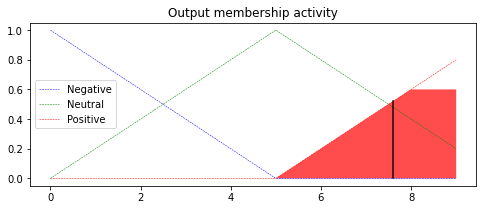

In [28]:
# Visualize Output Membership
fig, ax0 = plt.subplots(figsize=(8, 3))
    
ax0.fill_between(x_op, op0, op_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_op, op_Neg, 'b', linewidth=0.5, linestyle='--',label= 'Negative' )
ax0.fill_between(x_op, op0, op_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_op, op_Neu, 'g', linewidth=0.5, linestyle='--', label='Neutral')
ax0.fill_between(x_op, op0, op_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_op, op_Pos, 'r', linewidth=0.5, linestyle='--', label='Positive')
ax0.plot([op, op], [0, op_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Output membership activity')
ax0.legend()

In [29]:
print("\nFiring Strength of Negative (wneg): "+str(round(n2,4)))
print("Firing Strength of Neutral (wneu): "+str(round(neu2,4)))
print("Firing Strength of Positive (wpos): "+str(round(p2,4)))
    
print("\nResultant consequents MFs:" )
print("op_activation_low: "+str(op_activation_lo))
print("op_activation_med: "+str(op_activation_md))
print("op_activation_high: "+str(op_activation_hi))
    
print("\nAggregated Output: "+str(aggregated))

print("\nDefuzzified Output: "+str(output))


Firing Strength of Negative (wneg): 0.0
Firing Strength of Neutral (wneu): 0.0
Firing Strength of Positive (wpos): 0.6

Resultant consequents MFs:
op_activation_low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
op_activation_med: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
op_activation_high: [0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.6]

Aggregated Output: [0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.6]

Defuzzified Output: 7.6


In [30]:
# Scale : Neg Neu Pos   
if 0<(output)<3.33:    
  print("\nOutput after Defuzzification: Negative")
  sentiment.append("Negative")
        
elif 3.34<(output)<6.66:
  print("\nOutput after Defuzzification: Neutral")
  sentiment.append("Neutral")
   
elif 6.67<(output)<10:
  print("\nOutput after Defuzzification: Positive")
  sentiment.append("Positive")


Output after Defuzzification: Positive
